In [1]:
# %matplotlib inline
# !pip install pandas
import pandas as pd
# !pip install seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# !pip install scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

df = pd.read_csv('../../web_service_dataset.csv')

ImportError: DLL load failed while importing _cext: Impossibile trovare il modulo specificato.

In [4]:
import kiwisolver

Number of unique categories: 24
Number of unique web services: 141
Number of unique links: 2344392


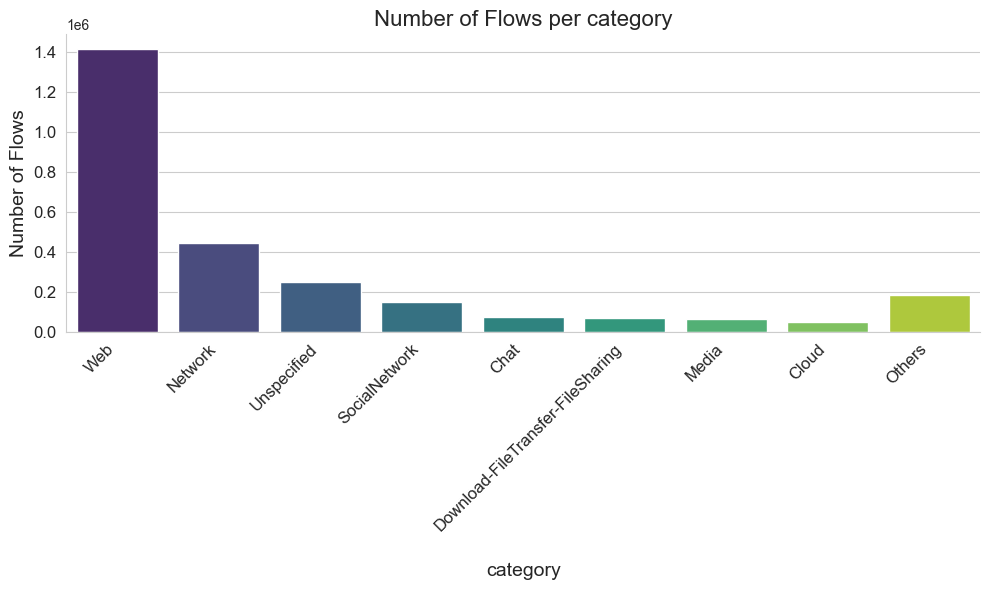

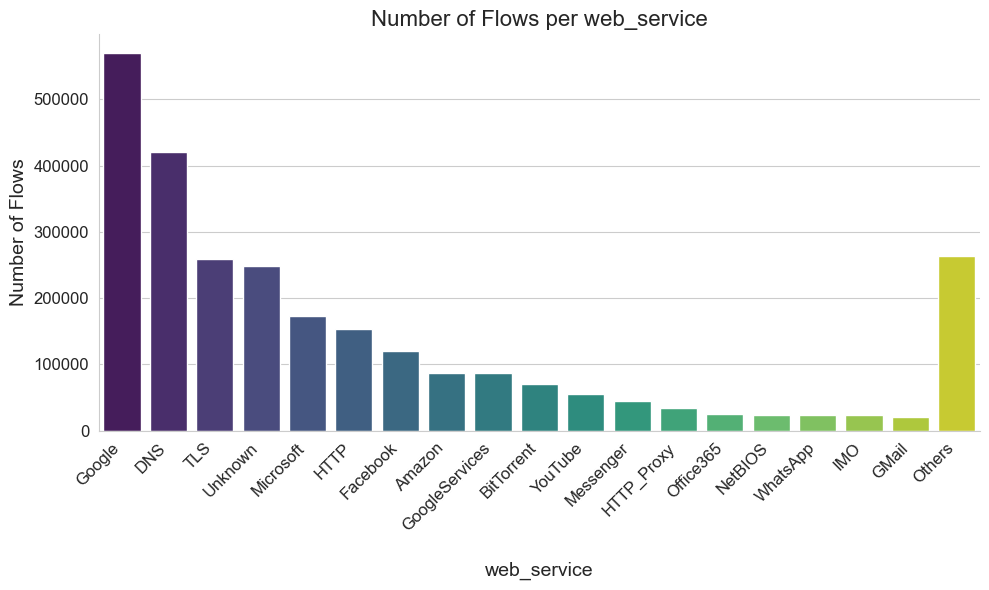

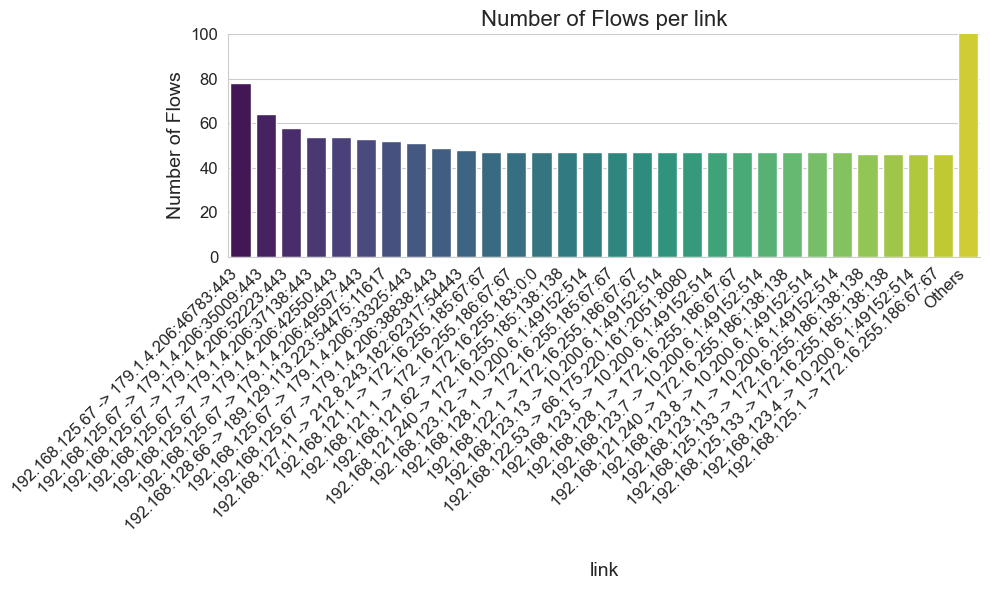

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.1
unique_categories = df['category'].nunique()
unique_web_services = df['web_service'].nunique()

df['link'] = df['src_ip'] + ' -> ' + df['dst_ip']  + ':' + df['src_port'].astype(str) + ':' + df['dst_port'].astype(str)
unique_links = df['link'].nunique()

print(f"Number of unique categories: {unique_categories}")
print(f"Number of unique web services: {unique_web_services}")
print(f"Number of unique links: {unique_links}")

df_categories = ['category', 'web_service', 'link']
threshold = [50000, 20000, 45]

# For each of the three entities, draw a bar plot indicating the number of flows belong to a class
# for a certain entity. If there are some targets (e.g., a certain web service) that have
# too few samples, group them as “others”

for index, elem in enumerate(df_categories):
    flow_by_elem = df.groupby(elem)[df_categories[index]]
    flow_count = flow_by_elem.count()
    flow_by_count = flow_count.sort_values(ascending=False)
    count_other = flow_by_count[flow_by_count.values < threshold[index]].sum()
    other_row = pd.Series(count_other, index=['Others'])
    flow_by_count = flow_by_count[flow_by_count > threshold[index]]
    flow_by_count = pd.concat([flow_by_count, other_row])

    # small_values = flow_by_elem[flow_by_elem.size() < df_threshold[index]].sum()
    # group_counts = flow_by_elem.size()
    # flow_by_elem = flow_by_elem[flow_by_elem.size() >= df_threshold[index]]
    #
    # if small_values > 0:
    #     flow_by_elem["Others"] = small_values

    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=flow_by_count.index, y=flow_by_count.values, hue=flow_by_count.index, palette='viridis', legend=False)
    plt.title(f'Number of Flows per {elem}', fontsize=16)
    plt.xlabel(f'{elem}', fontsize=14, labelpad=20)
    plt.ylabel("Number of Flows", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    if index==2:
        plt.ylim(0, 100)
    sns.despine()
    plt.tight_layout()
    plt.show()



In [30]:
# 1.2
from sklearn.preprocessing import LabelEncoder

# How many unique protocols are there in the dataset?
unique_proto = df['proto'].unique()

print(f"Number of unique proto: {len(unique_proto)}")

# Convert such a categorical feature into a numerical one through one-hot encoding.
one_hot_proto = pd.get_dummies(df['proto'], prefix='proto')

# Convert string labels (category and web service) into numerical classes.

label_encoder_category = LabelEncoder()
label_encoder_service = LabelEncoder()
category_numerical_class = label_encoder_category.fit_transform(df['category'])
web_service_numerical_class = label_encoder_service.fit_transform(df['web_service'])

print(category_numerical_class)
print(web_service_numerical_class)



Number of unique proto: 3
[11 11 11 ... 18 23 23]
[17 17 17 ... 64 31 31]


In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Count unique protocols
unique_proto = df['proto'].unique()
print(f"Number of unique protocols: {len(unique_proto)}")

# One-hot encode the `proto` column
one_hot_proto = pd.get_dummies(df['proto'], prefix='proto')
df_copy = pd.concat([df, one_hot_proto], axis=1)
df_copy.drop('proto', axis=1, inplace=True)

# Label encode the `category` and `web_service` columns
label_encoder_category = LabelEncoder()
label_encoder_service = LabelEncoder()

df_copy['category_numerical'] = label_encoder_category.fit_transform(df['category'])
df_copy['web_service_numerical'] = label_encoder_service.fit_transform(df['web_service'])

# Check mappings (optional)
print("Category mappings:", dict(enumerate(label_encoder_category.classes_)))
print("Web service mappings:", dict(enumerate(label_encoder_service.classes_)))

# Final DataFrame structure
df_copy


Number of unique protocols: 3
Category mappings: {0: 'Chat', 1: 'Cloud', 2: 'Collaborative', 3: 'DataTransfer', 4: 'Database', 5: 'Download-FileTransfer-FileSharing', 6: 'Email', 7: 'Game', 8: 'Media', 9: 'Mining', 10: 'Music', 11: 'Network', 12: 'RPC', 13: 'RemoteAccess', 14: 'Shopping', 15: 'SocialNetwork', 16: 'SoftwareUpdate', 17: 'Streaming', 18: 'System', 19: 'Unspecified', 20: 'VPN', 21: 'Video', 22: 'VoIP', 23: 'Web'}
Web service mappings: {0: '104', 1: 'AJP', 2: 'Amazon', 3: 'AmazonVideo', 4: 'Apple', 5: 'ApplePush', 6: 'AppleStore', 7: 'AppleiCloud', 8: 'AppleiTunes', 9: 'BGP', 10: 'BJNP', 11: 'BitTorrent', 12: 'CNN', 13: 'CiscoSkinny', 14: 'CiscoVPN', 15: 'Citrix', 16: 'Cloudflare', 17: 'DHCP', 18: 'DNP3', 19: 'DNS', 20: 'DNSoverHTTPS', 21: 'DataSaver', 22: 'Deezer', 23: 'Direct_Download_Link', 24: 'Dropbox', 25: 'FTP_CONTROL', 26: 'FTP_DATA', 27: 'Facebook', 28: 'GMail', 29: 'GTP', 30: 'Github', 31: 'Google', 32: 'GoogleDocs', 33: 'GoogleDrive', 34: 'GoogleHangoutDuo', 35: 

,src_ip,src_port,dst_ip,dst_port,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,...,b_avg_piat,b_std_dev_piat,category,web_service,link,proto_ICMP,proto_TCP,proto_UDP,category_numerical,web_service_numerical
0,192.168.121.1,67,172.16.255.185,67,22,7620,328,394,346.363636,25.010081,...,51.689181,84.916348,Network,DHCP,192.168.121.1 -> 172.16.255.185:67:67,False,False,True,11,17
1,192.168.121.1,67,172.16.255.186,67,17,5670,328,354,333.529412,9.140200,...,0.000000,0.000000,Network,DHCP,192.168.121.1 -> 172.16.255.186:67:67,False,False,True,11,17
2,192.168.121.1,67,172.16.255.185,67,43,15124,328,394,351.720930,26.098495,...,89.927588,124.270745,Network,DHCP,192.168.121.1 -> 172.16.255.185:67:67,False,False,True,11,17
3,192.168.121.1,67,172.16.255.186,67,30,10086,328,352,336.200000,10.057833,...,0.000000,0.000000,Network,DHCP,192.168.121.1 -> 172.16.255.186:67:67,False,False,True,11,17
4,192.168.121.1,0,10.130.1.166,0,1,56,56,56,56.000000,0.000000,...,0.000000,0.000000,Network,ICMP,192.168.121.1 -> 10.130.1.166:0:0,True,False,False,11,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,192.168.128.252,137,172.16.255.186,137,9,702,78,78,78.000000,0.000000,...,0.000000,0.000000,System,NetBIOS,192.168.128.252 -> 172.16.255.186:137:137,False,False,True,18,64
2704835,192.168.128.252,138,172.16.255.185,138,3,687,229,229,229.000000,0.000000,...,0.000000,0.000000,System,NetBIOS,192.168.128.252 -> 172.16.255.185:138:138,False,False,True,18,64
2704836,192.168.128.252,138,172.16.255.186,138,3,687,229,229,229.000000,0.000000,...,0.000000,0.000000,System,NetBIOS,192.168.128.252 -> 172.16.255.186:138:138,False,False,True,18,64
2704837,192.168.128.252,49879,108.177.11.188,5228,75,3520,40,66,46.933333,6.685972,...,44.999017,14.822745,Web,Google,192.168.128.252 -> 108.177.11.188:49879:5228,False,True,False,23,31
